# Exercise 3: Predicting Customer Spend - Part 2
* Cho dữ liệu **retail_transactions.csv** _(chưa dc tiền xử lí)_ bao gồm các thông tin như sau:
  ![](../images/19.jpg)
  Hãy chuẩn hóa dữ liệu này và lưu vào tập tin **wrangled_transaction.csv**, gồm các thông tin như sau:
  ![](../images/20.jpg)
* Thông tin cung cấp:
  * Dataset này chứa các lịch sử giao dịch từ năm 2010 đến 2011. Với mỗi giao dịch có chứa **customer identifier** _(CustomerID)_, **số lượng hàng đã mua** _(Quantity)_, **ngày mua** _(InvoiceDate)_, **đơn giá** _(Unitprice)_ và một số thông tin khác về mặt hàng đã mua.
  * Cần tiền xử lí dữ liệu này thành dữ liệu giao dịch của khách hàng từ năm 2010 sau đó so với chỉ tiêu năm 2011. Vậy nên cần tạo ra các feature từ dữ liệu cho năm 2010 và tính toán số tiền đã chi cho năm 2011.
  * Khi xây dựng mô hình này, nó sẽ khái quất cho những năm tới. Nhờ đó doanh nghiệp có thể sử dụng dữ liệu năm 2020 để dự đoán trc hành vi chi tiêu vào năm 2021 _(trừ khi thị trường hoặc doanh nghiệp đã thay đổi đáng kể kể từ khoảng thời gian dữ liệu dc sử dụng để build model)_.

* Yêu cầu:
  * Xây dựng model bằng Linear Regression để dự đoán `customer spend` với input là tập dữ liệu **wrangled_transactions.csv** đã dc tiền xử lí.
  * Đánh giá model, trực quan hóa kết quả.
  * Với `2010 revenue`, `days_since_last_purchase`, `number_of_purchases`, `avg_order_cost` lần lượt là 1000, 20, 2, 500 thì `2011 revenue` là bao nhiêu?

**Đọc dữ liệu**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'./data/wrangled_transactions.csv', index_col='CustomerID')
df.head()

2010 revenue  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       23.0                      23.0   
12348.0           892.80                       14.0                      14.0   
12370.0          1868.02                       16.0                      13.0   
12377.0          1001.52                       10.0                      10.0   
12383.0           600.72                        8.0                       8.0   

            number_of_purchases  avg_order_cost  2011 revenue  
CustomerID                                                     
12347.0                     1.0          711.79       3598.21  
12348.0                     1.0          892.80        904.44  
12370.0                     2.0          934.01       1677.67  
12377.0                     1.0         1001.52        626.60  
12383.0                     1.0          600.72       1249.84

In [3]:
from modules.data_preprocessing import eda

In [4]:
eda(df)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


> **Nhận xét**
> * Các thuộc tính `2010 revenue`, `avg_order_cost` bị lệch phải $\Rightarrow$ áp dụng log normalization.

**Áp dụng log normalization trên hai thuộc tính `2010 revenue` và `avg_order_cost`**

In [5]:
from modules.data_preprocessing import logNormalization

data = logNormalization(df, ['2010 revenue', 'avg_order_cost'])

data

2010 revenue  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       23.0                      23.0   
12348.0           892.80                       14.0                      14.0   
12370.0          1868.02                       16.0                      13.0   
12377.0          1001.52                       10.0                      10.0   
12383.0           600.72                        8.0                       8.0   
...                  ...                        ...                       ...   
18229.0           653.20                       29.0                      22.0   
18239.0           438.10                       28.0                      28.0   
18245.0           365.73                       11.0                      11.0   
18259.0           376.30                       22.0                      22.0   
18260.0           230.70                       14.0                      14.0   

            number_of_purchases  avg_order_cost  2011 revenue  \
CustomerID                                                      
12347.0                     1.0          711.79       3598.21   
12348.0                     1.0          892.80        904.44   
12370.0                     2.0          934.01       1677.67   
12377.0                     1.0         1001.52        626.60   
12383.0                     1.0          600.72       1249.84   
...                         ...             ...           ...   
18229.0                     2.0          326.60       6623.70   
18239.0                     1.0          438.10       1123.51   
18245.0                     1.0          365.73       2201.33   
18259.0                     1.0          376.30       1962.30   
18260.0                     1.0          230.70       2412.50   

            2010 revenue log  avg_order_cost log  
CustomerID                                        
12347.0             6.567783            6.567783  
12348.0             6.794363            6.794363  
12370.0             7.532634            6.839487  
12377.0             6.909274            6.909274  
12383.0             6.398129            6.398129  
...                      ...                 ...  
18229.0             6.481883            5.788736  
18239.0             6.082447            6.082447  
18245.0             5.901895            5.901895  
18259.0             5.930387            5.930387  
18260.0             5.441118            5.441118  

[738 rows x 8 columns]

**Tiến hành chia dữ liệu train và test và áp dụng Multiple Linear Regression**

In [6]:
from modules.regression import MyMultipleLinearRegression

In [7]:
inputs = data[['2010 revenue log','days_since_last_purchase', 'number_of_purchases', 'avg_order_cost log']]
outputs = data['2011 revenue']

model = MyMultipleLinearRegression()
model.createTrainTestData(inputs, outputs)

In [8]:
model.data

2010 revenue log  days_since_last_purchase  number_of_purchases  \
CustomerID                                                                    
12347.0             6.567783                      23.0                  1.0   
12348.0             6.794363                      14.0                  1.0   
12370.0             7.532634                      13.0                  2.0   
12377.0             6.909274                      10.0                  1.0   
12383.0             6.398129                       8.0                  1.0   
...                      ...                       ...                  ...   
18229.0             6.481883                      22.0                  2.0   
18239.0             6.082447                      28.0                  1.0   
18245.0             5.901895                      11.0                  1.0   
18259.0             5.930387                      22.0                  1.0   
18260.0             5.441118                      14.0                  1.0   

            avg_order_cost log  2011 revenue  
CustomerID                                    
12347.0               6.567783       3598.21  
12348.0               6.794363        904.44  
12370.0               6.839487       1677.67  
12377.0               6.909274        626.60  
12383.0               6.398129       1249.84  
...                        ...           ...  
18229.0               5.788736       6623.70  
18239.0               6.082447       1123.51  
18245.0               5.901895       2201.33  
18259.0               5.930387       1962.30  
18260.0               5.441118       2412.50  

[738 rows x 5 columns]

**Feature scaler bằng Robust do dữ liệu có outlier và phân phối ko chuẩn**

In [9]:
from modules.data_preprocessing import scaler

inputs_scale = scaler(inputs, 'robust')
inputs_scale

2010 revenue log  days_since_last_purchase  number_of_purchases  \
0            0.711221                  0.555556                  0.0   
1            0.927157                 -0.444444                  0.0   
2            1.630748                 -0.555556                  1.0   
3            1.036670                 -0.888889                  0.0   
4            0.549537                 -1.111111                  0.0   
..                ...                       ...                  ...   
733          0.629357                  0.444444                  1.0   
734          0.248684                  1.111111                  0.0   
735          0.076614                 -0.777778                  0.0   
736          0.103767                  0.444444                  0.0   
737         -0.362518                 -0.444444                  0.0   

     avg_order_cost log  
0              1.056559  
1              1.335427  
2              1.390966  
3              1.476858  
4              0.847753  
..                  ...  
733            0.097728  
734            0.459220  
735            0.237001  
736            0.272068  
737           -0.330112  

[738 rows x 4 columns]

**Tiến hành chia lại tập input và output với input mới là `inputs_scale`**

In [10]:
model.createTrainTestData(inputs_scale, outputs)
model.data

2010 revenue log  days_since_last_purchase  number_of_purchases  \
0.0              0.711221                  0.555556                  0.0   
1.0              0.927157                 -0.444444                  0.0   
2.0              1.630748                 -0.555556                  1.0   
3.0              1.036670                 -0.888889                  0.0   
4.0              0.549537                 -1.111111                  0.0   
...                   ...                       ...                  ...   
18229.0               NaN                       NaN                  NaN   
18239.0               NaN                       NaN                  NaN   
18245.0               NaN                       NaN                  NaN   
18259.0               NaN                       NaN                  NaN   
18260.0               NaN                       NaN                  NaN   

         avg_order_cost log  2011 revenue  
0.0                1.056559           NaN  
1.0                1.335427           NaN  
2.0                1.390966           NaN  
3.0                1.476858           NaN  
4.0                0.847753           NaN  
...                     ...           ...  
18229.0                 NaN       6623.70  
18239.0                 NaN       1123.51  
18245.0                 NaN       2201.33  
18259.0                 NaN       1962.30  
18260.0                 NaN       2412.50  

[1476 rows x 5 columns]

**Build model**

In [11]:
model.initModel()

**Đánh giá model**

In [12]:
model.evaluate()

R^2 all  R^2 train  R^2 test           MSE          MAE
0  0.247951    0.24114  0.275348  1.123652e+07  2096.661136

> **Nhận xét**
> * Tất cả các chỉ số đều ko tốt.

In [13]:
from modules.drawer import visualDistributionPlot

/home/manhcuong/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/manhcuong/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/manhcuong/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

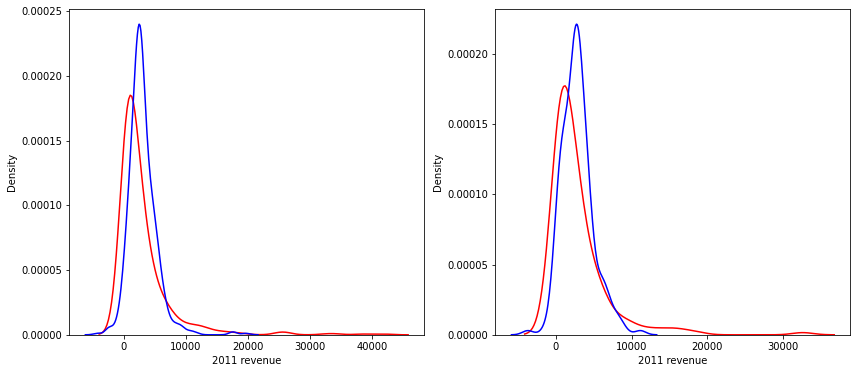

In [14]:
visualDistributionPlot(model)

In [15]:
from modules.drawer import MySeaborn

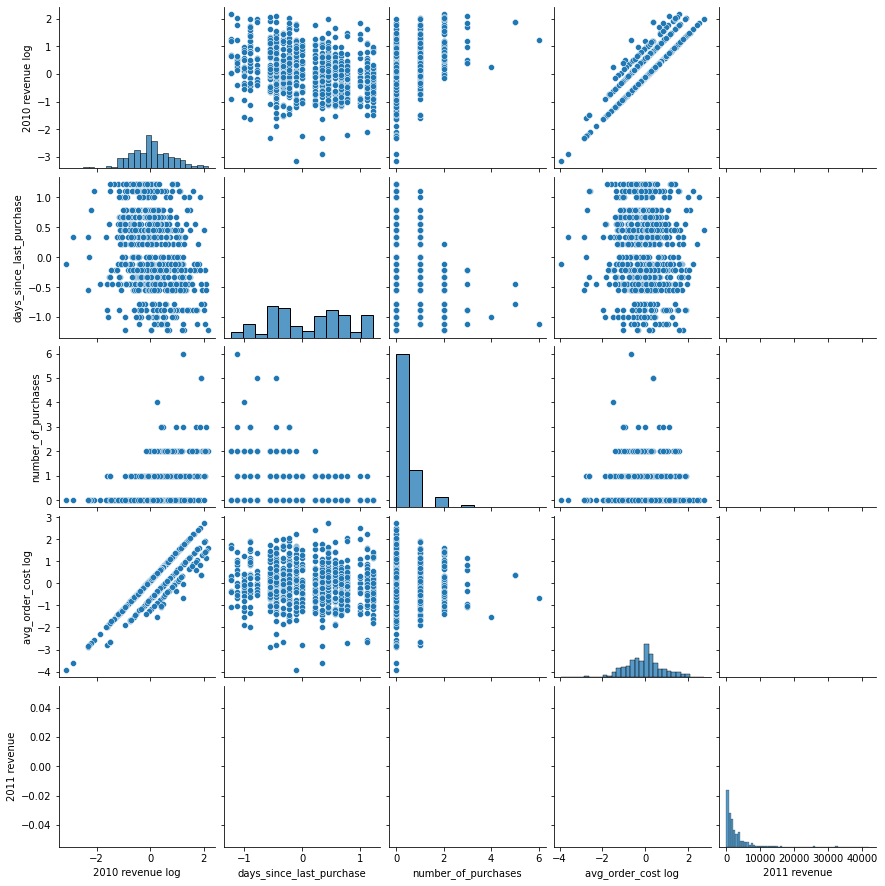

In [16]:
sb = MySeaborn(model.data)
sb.pairplot()

> **Nhận xét**
> * Giữa kết quả dự đoán và thực tế có chênh lệch lớn.
> * Multiple Linear Regression ko phù hợp vs dữ liệu này.
> * Từ pairplot trên dễ dàng nhận thấy chỉ có `avg_order_cost log` và `2010 revenue log` là có mối quan hệ tuyến tính khá mạnh, còn lại thì ko.

**Áp dụng thử multivariate polynomial cho dataset này**

In [17]:
from modules.regression import MyMultivariatePolynomial

In [18]:
model = MyMultivariatePolynomial()
model.createTrainTestData(inputs_scale, outputs, degree=2)
model.initModel()
model.evaluate()

R^2 all  R^2 train  R^2 test           MSE          MAE
0  0.247951    0.24114  0.275348  1.123652e+07  2096.661136

> **Nhận xét**
> * Các điểm số cũng ko có cải thiện $\Rightarrow$ thử tăng lên `degree=3`

In [19]:
model.createTrainTestData(inputs_scale, outputs, degree=3)
model.initModel()
model.evaluate()

R^2 all  R^2 train  R^2 test           MSE          MAE
0  0.247951    0.24114  0.275348  1.123652e+07  2096.661136

> **Nhận xét**
> * Nhìn chung, đối với dataset này ko thể áp dụng các thuật toán thuộc nhóm regression dc.
> * Có thể thiếu dữ liệu ban đầu, vì chỉ dùng dữ liệu của năm 2010 mà để dự đoán cho năm 2011 là quá ít.